In [ ]:
# Initialize drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Move to Google Drive 
%cd drive
%cd 'My Drive'
%cd 'MSc Stats Dissertation'

/content/drive
/content/drive/My Drive
/content/drive/My Drive/MSc Stats Dissertation


In [ ]:
!pip install GPyOpt
!pip install guacamol
!pip install selfies
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 1.0MB 6.7MB/s 
     |████████████████████████████████| 71kB 7.1MB/s 
  Created wheel for GPyOpt: filename=GPyOpt-1.2.6-cp36-none-any.whl size=83623 sha256=a4699ded77b92058ec2e2befeb1634b5b491c964586e6fb56d0809633366a940
  Stored in directory: /root/.cache/pip/wheels/b2/00/69/cfa967a125cf25e66f644be6193ad6f0edf231147879ad714f
  Created wheel for GPy: filename=GPy-1.9.9-cp36-cp36m-linux_x86_64.whl size=2633902 sha256=bcdb6b0b720aac73ce6537f45fe1afb6b20bb8fce48f22d3d0a44eca440e7220
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp36-none-any.whl size=102552 sha256=0d663bf4baf65f18f46f2883a301687c5cffbf0261009537187b3e9c698d88ad
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPyOpt GPy paramz
     |█████████████

In [ ]:
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as K
import tensorflow.keras as keras
import pandas as pd
import math
import tensorflow.keras.layers as layers
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy.stats import multivariate_normal
from selfies import encoder, decoder
import rdkit

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from numpy.random import multivariate_normal
import GPyOpt
from GPyOpt.methods import BayesianOptimization
from IPython.display import SVG, display
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools

In [ ]:
import GANS.conv_smiles_vae as conv_smiles_vae
import GANS.implicitvae as implicitvae
import GANS.proppred_deep_conv_smiles_vae as proppred_vae
import GANS.decoderTransformerLatent as decoderTransformerLatent
import GANS.ic50vae as ic50vae
import GPyOpt
from GPyOpt.methods import BayesianOptimization

In [ ]:
from typing import List
from guacamol.distribution_matching_generator import DistributionMatchingGenerator
class MockGenerator(DistributionMatchingGenerator):
    """
    Mock generator that returns pre-defined molecules,
    possibly split in several calls
    """

    def __init__(self, molecules: List[str]) -> None:
        self.molecules = molecules
        self.cursor = 0

    def generate(self, number_samples: int) -> List[str]:
        end = self.cursor + number_samples

        sampled_molecules = self.molecules[self.cursor:end]
        self.cursor = end
        return sampled_molecules

In [ ]:
from guacamol.distribution_learning_benchmark import ValidityBenchmark, \
    UniquenessBenchmark, NoveltyBenchmark, KLDivBenchmark

In [ ]:
train_smiles_X = np.load('./vocab/train_selfies_X.npy',allow_pickle=True)
vocab =np.load('./vocab/selfies_vocab.npy',allow_pickle=True)
vocab_index = np.load('./vocab/selfies_vocab_index.npy',allow_pickle=True)
vocab = dict(vocab.ravel()[0])
vocab_index = dict(vocab_index.ravel()[0])

In [ ]:
## Neccesary CONSTANTS
BATCH_SIZE = 256
VOCAB_SIZE = len(vocab_index)
EPOCHS = 10
LEARNING_RATE =  1e-4
PAD_SIZE = 250
DROP_OUT= 0.2
EMBEDDING_DIM = 192  ## Embedding dim of the characters
HIDDEN_DIM = 256
DROPOUT = 0.2
TRAIN = False
LATENT_DIM = 64
DEEP = False
SELFIES = True
IMPLICIT = False
PROPPRED = False 
TRANSFORMER_DECODE = True
MAX_LEN = PAD_SIZE-1

In [ ]:
gene_expressions = np.load('gene_expressions.npy')
ic50 = np.load('ic50.npy')
smiles_pairs = np.load('smiles_pairs.npy')
sites = np.load('sites.npy')
cell_lines = np.load('cell_lines.npy')
histologies = np.load('histologies.npy')

In [ ]:
## Get random particular cell line
indices = []
index = 0 
for i in histologies:
  if  cell_lines[index] =='SHP-77':
    indices.append(index)
  index+=1
sampled_smiles = np.array(smiles_pairs)[indices]
sampled_ic50 = ic50[indices]
sampled_gene_expressions = gene_expressions[indices]

In [ ]:
smiles_pairs_enc = []
for smiles in  sampled_smiles:
  smiles_pairs_enc.append(encoder(smiles))
sampled_smiles = np.array(smiles_pairs_enc)

In [ ]:
## Takes processed smiles/deep smiles and returns the tokenized 
## versions of the smiles or deep semiles
## Note: Run replace halogens and replace percentages
## before running this method 
def tokenize_smiles(smiles):
  char_list = list(smiles)
  tokenized= []
  tokenized.append('<BOS>')
  i = 0 
  while i < len(char_list):
    char = char_list[i]
    tokenized.append(char)
    i= i+1
  tokenized.append('<EOS>')
  return tokenized

In [ ]:
def integer_encode_selfies(selfies,vocab_dict):
  selfies_enc = []
  for char in selfies:
    selfies_enc.append(vocab_dict[char])
  return selfies_enc

In [ ]:
def integer_encode(smiles,vocab_dict):
  smiles_enc = []
  for char in smiles:
    smiles_enc.append(vocab_dict[char])
  return smiles_enc

In [ ]:
import re
## replace Br and Cl with single letters
def replace_halogens(string):
  br = re.compile('Br')
  cl = re.compile('Cl')
  string = br.sub('R', string)
  string = cl.sub('L', string)
  return string

In [ ]:
import re
## replace Br and Cl with single letters
def replace_halogens_inv(string):
  br = re.compile('R')
  cl = re.compile('L')
  string = br.sub('Br', string)
  string = cl.sub('Cl', string)
  return string

In [ ]:
## Takes processed selfies smiles and returns the tokenized 
## versions of the selfies
def tokenize_selfies(selfies):
  char_list = split_selfie(selfies)
  tokenized= []
  tokenized.append('<BOS>')
  i = 0 
  while i < len(char_list):
    char = char_list[i]
    tokenized.append(char)
    i = i+1
  tokenized.append('<EOS>')
  return tokenized

In [ ]:
## Splits the selfies <molecule> into a list of character strings.
def split_selfie(molecule):
  return re.findall(r'\[.*?\]|\.', molecule)

In [ ]:
smile_pair_tokens = []
for smiles in sampled_smiles:
  if SELFIES:
    smile_pair_tokens.append(tokenize_selfies(smiles))
  else:
    smiles = replace_halogens(smiles)
    smile_pair_tokens.append(tokenize_smiles(smiles))
smile_pair_tokens = np.array(smile_pair_tokens)

In [ ]:
smiles_ordered = []
for smiles in smile_pair_tokens:
  if SELFIES:
    smiles_ordered.append(integer_encode_selfies(smiles,vocab))
  else:
    smiles_ordered.append(integer_encode(smiles,vocab))
smiles_ordered = np.array(smiles_ordered)
smiles_ordered = tf.keras.preprocessing.sequence.pad_sequences(smiles_ordered,maxlen = PAD_SIZE,padding='post')

In [ ]:
import GANS.renewed_smiles_vae as conv_smiles_vae
smile_vae = conv_smiles_vae.SMILE_VAE(vocab_size= VOCAB_SIZE,embedding_dim=EMBEDDING_DIM, max_len= MAX_LEN, 
                     latent_dim = LATENT_DIM, recurrent_dropout = DROP_OUT,dropout_rate= DROP_OUT)
if SELFIES:
  smile_vae.load_weights('selifes_conv_vae_weights2')
else:
  smile_vae.load_weights('smiles_conv_vae_weights2')

In [ ]:
smile_vae = ic50vae.SMILE_VAE(vocab_size= VOCAB_SIZE,embedding_dim=EMBEDDING_DIM, max_len= MAX_LEN,
                     latent_dim = LATENT_DIM, recurrent_dropout = DROP_OUT,dropout_rate= DROP_OUT)

In [ ]:
if SELFIES:
  smile_vae.load_weights('ic50g_selfies_conv_vae_weights')
else:
  smile_vae.load_weights('ic50g_smile_conv_vae_weights')

In [ ]:
## Get latent encodings 
sampled_smiles =[]
for smiles in smiles_ordered:
  h, z_mean,z_log_var  = smile_vae.encoder(np.array(smiles[:-1]).reshape(1,MAX_LEN,))
  sampled_smiles.append(z_mean)

In [ ]:
from sklearn.decomposition import KernelPCA
NUM_SAMPLED = len(sampled_smiles)
sampled_points = np.array(sampled_smiles).reshape(NUM_SAMPLED,LATENT_DIM)
PCA = KernelPCA(n_components=2, kernel="linear")
data_transformed = PCA.fit_transform(sampled_points)
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
scaler1.fit(np.array(data_transformed[:,0]).reshape(-1,1))
scaler2 = MinMaxScaler()
scaler2.fit(np.array(data_transformed[:,1]).reshape(-1,1))

plot  = {0: [x[0].reshape(1,-1) for x in data_transformed],
             1: [x[1].reshape(1,-1) for x in data_transformed]}

(-3.9009358167648314,
 14.819742369651795,
 -4.274020087718964,
 14.446658098697664)

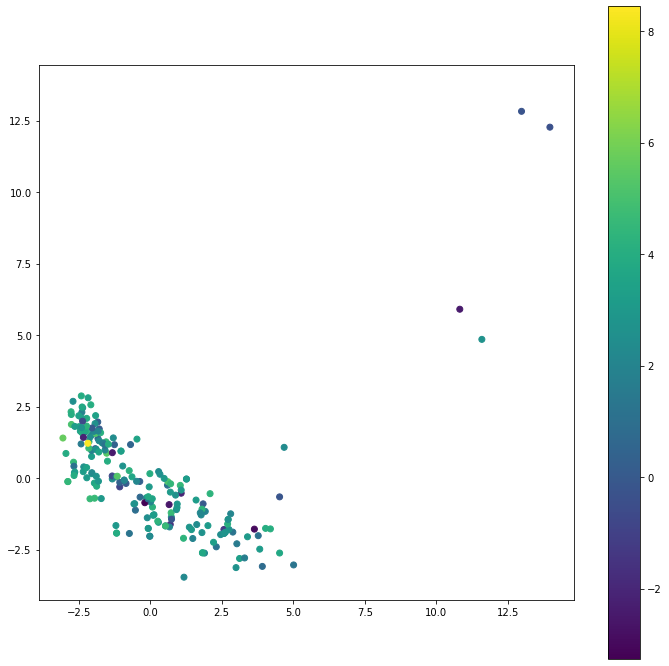

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
im = ax.hexbin(plot[0], plot[1],C =sass , reduce_C_function=np.mean)
plt.xlim(-3, 3)
plt.ylim(-1, 10)
fig.colorbar(im, ax=ax)
plt.axis('square')

In [ ]:
import GANS.ic50pred as ic50pred
ic50pred = ic50pred.IC50_MCA(vocab_size=VOCAB_SIZE, 
                    embedding_dim =EMBEDDING_DIM, num_genes =2128,
                    hidden_dim = HIDDEN_DIM, max_len = MAX_LEN, 
                    latent_dim = LATENT_DIM)
ic50pred.load_weights('ic50network_selfies_ic50g')

In [ ]:
def smile_to_smiles_percentage2(z):
  z_mean = z 
  zs = []
  decode_attempts = 10
  for i in range(decode_attempts):
    #zs.append(z_mean)
    #zs.append(tf.keras.layers.Lambda(smile_vae.encoder.sample, output_shape =(z_log_var.shape[1],))([z_mean,z_log_var]))
    #zs.append(perturb_z(z_mean,noise_norm))
    zs.append(perturb_z(z_mean,1.0))
  zs = np.array(zs)
  zs = zs.reshape((zs.shape[0],zs.shape[-1]))
  #print(zs.shape)
  x_decoded = []
  #for z in zs:
  if TRANSFORMER_DECODE:
    x_decoded = transformer
  decoded_smiles = []
  for x_dec in x_decoded:
    decoded_smiles.append(get_smiles_from_logits(tf.reshape(x_dec,[1,MAX_LEN,VOCAB_SIZE]),vocab_index))
  actual_smiles =decoded_smiles
  if DEEP == True:
    actual_smiles = get_smiles_from_deep(decoded_smiles)
    correct_smiles =[v for i,v in enumerate(actual_smiles) if v != None]
  elif SELFIES:
    actual_smiles = get_smiles_from_selfies(decoded_smiles)
    correct_smiles =[v for i,v in enumerate(actual_smiles) if v != None]
  else:
    correct_smiles =[replace_halogens_inv(v) for i,v in enumerate(actual_smiles) if v != None]
  num_samples = len(correct_smiles)
  generator = MockGenerator(correct_smiles)
  benchmark = UniquenessBenchmark(number_samples=num_samples)
  
  return benchmark.assess_model(generator).score*decode_attempts

In [ ]:
def smile_to_smiles_percentage(smile_vae, z, decode_attempts = 500, noise_norm = 1.0 ):
  z_mean = z 
  zs = []
  for i in range(decode_attempts):
    #zs.append(z_mean)
    #zs.append(tf.keras.layers.Lambda(smile_vae.encoder.sample, output_shape =(z_log_var.shape[1],))([z_mean,z_log_var]))
    #zs.append(perturb_z(z_mean,noise_norm))
    zs.append(perturb_z(z_mean,noise_norm))
  zs = np.array(zs)
  zs = zs.reshape((zs.shape[0],zs.shape[-1]))
  x_decoded = []
  #for z in zs:
  x_decoded = smile_vae.decoder(zs)
  decoded_smiles = []
  for x_dec in x_decoded:
    decoded_smiles.append(get_smiles_from_logits(tf.reshape(x_dec,[1,MAX_LEN,VOCAB_SIZE]),vocab_index))
  actual_smiles =decoded_smiles
  if DEEP == True:
    actual_smiles = get_smiles_from_deep(decoded_smiles)
    correct_smiles =[v for i,v in enumerate(actual_smiles) if v != None]
  elif SELFIES:
    actual_smiles = get_smiles_from_selfies(decoded_smiles)
    correct_smiles =[v for i,v in enumerate(actual_smiles) if v != None]
  else:
    correct_smiles =[replace_halogens_inv(v) for i,v in enumerate(actual_smiles) if v != None]
  num_samples = len(correct_smiles)
  print(correct_smiles)
 
  correct_smiles_idx = []
  indx = 0
  for smiles in correct_smiles:
    mol = rdkit.Chem.MolFromSmiles(smiles)
    idx_v = smiles != '' and mol is not None and mol.GetNumAtoms() > 0
    if idx_v:
      correct_smiles_idx.append(indx)
    indx+=1
  print(correct_smiles_idx)
  if len(correct_smiles_idx) > 0:
    print(np.array(correct_smiles)[correct_smiles_idx])
    correct_smiles =np.array(correct_smiles)[correct_smiles_idx]
  generator = MockGenerator(correct_smiles)
  benchmark = UniquenessBenchmark(number_samples=num_samples)
  print("Percentage of unique Generated SMILES: " + \
  "{:.3f}".format(benchmark.assess_model(generator).score))
  print("Number of unique Generated SMILES: " + "{:.3f}".format(len(correct_smiles)))
  return correct_smiles

In [ ]:
## converts smiles to deep smiles 
def get_smiles_from_selfies(deep_list):
  smiles = []
  for deep in deep_list:
    try:
      smile = decoder(deep)
    except:
      smile = None
    smiles.append(smile)
  return smiles

In [ ]:
def get_smiles_from_logits(logits,vocab_index, temperature =1.0):
  logits = logits/temperature
  #soft = tf.nn.softmax(logits, axis = -1)
  #prediction  = # tf.argmax(soft, -1) 
  text_generated = []
  for i in logits[0]:
    j = np.argmax(i)#tf.random.categorical(tf.reshape(i,[1,len(i)]), num_samples=1)[0][0].numpy()
    text_generated.append(vocab_index[j])
  if '<EOS>' in text_generated:
    eos_index = text_generated.index('<EOS>')
    text_generated = text_generated[:eos_index]
  else:
    text_generated = ''
  return (''.join(text_generated))

In [ ]:
def perturb_z( z, noise_norm, constant_norm=False):
  if noise_norm > 0.0:
    noise_vec = np.random.normal(0, 1, size=z.shape)
    noise_vec = noise_vec / np.linalg.norm(noise_vec)
    if constant_norm:
      return z + (noise_norm * noise_vec)
    else:
      noise_amp = np.random.uniform(
          0, noise_norm, size=(z.shape[0], 1))
      return z + (noise_amp * noise_vec)
  else:
    return z

In [ ]:
## We will now perform Bayesian optimization in space for a given target
## cell-line, histology within the latent space 
transformer = decoderTransformerLatent.Transformer(embedding_dim=384,embedding_dropout =DROP_OUT,max_len=MAX_LEN,
                                                   num_heads = 6, num_layers = 6,
                      vocab_size = VOCAB_SIZE,attention_dropout =DROP_OUT,d_hid=EMBEDDING_DIM *4,use_one_embedding_dropout=False)
transformer.load_weights('decoding_deep_smiles_latent')

In [ ]:
max_bounds = np.zeros(LATENT_DIM)
min_bounds  = np.zeros(LATENT_DIM)
for latent_dim in sampled_smiles:
  for latent_val_index in range(len(latent_dim[0])):
    max_bounds[latent_val_index] = max(max_bounds[latent_val_index],latent_dim[0][latent_val_index])
    min_bounds[latent_val_index] = min(min_bounds[latent_val_index],latent_dim[0][latent_val_index])
print(max_bounds)
print(min_bounds)

In [ ]:
bounds  =[(-10,10)]*LATENT_DIM 
## Create domain bounds ##
domains = []
for idx in range(len(bounds)):
  domain =  {'name': 'latent'+str(idx), 'type': 'continuous'}
  domain['domain'] = bounds[idx]     
  domains.append(domain)      
sampled_smiles = np.array(sampled_smiles).reshape(201,64)
print(sampled_smiles.shape)
sampled_predictions = -1*ic50pred(sampled_smiles,genes =sampled_gene_expressions.reshape(201,2128))
print(sampled_predictions.shape)

In [ ]:
def obj_function(z):
  ##'SHP-77' gene-expression 

  ##  Contrict objective function 
  x = 0
 ''' x = smile_to_smiles_percentage2(z)
  print('OBJ RUN:' + str(x))
  if (x < 0.05):
    x = 1000
  else:
    x = 0 '''
  val = ic50pred(encoded_smiles = z, genes = sampled_gene_expressions[0].reshape(1,2128)).numpy()[0][0] - x
  print(val)
  return -1*val

In [ ]:
UBO = BayesianOptimization(f=obj_function, X =sampled_smiles,Y = sampled_predictions,
                           domain=domains,model_type='sparseGP',batch_size=1,initial_design_numdata=0)
MAX_ITER = 200
UBO.run_optimization(max_iter = MAX_ITER)

In [ ]:
## Get input and output of the optimizations
ins = np.array(UBO.X).tolist()
print(len(ins))
outs = np.array(UBO.Y *-1).tolist()
print(len(outs))
outs, ins = (list(t) for t in zip(*sorted(zip(outs, ins))))

211
211


In [ ]:
print("Value of z that minimises the objective:" + str(UBO.x_opt)) 
print("Maximum value of the objective: "+str(-UBO.fx_opt))     
UBO.plot_convergence()

Value of z that minimises the objective:[ 4.52414861  0.43723325 -6.34376298 -0.44273558 -8.6569322  -8.09698771
 -7.26380562 -8.77301786 -5.17164693 -4.64994393 -6.05424085 -3.61597965
 -3.66063285 -1.53373003  1.88184657  5.94065799 -9.31803028  0.79524553
  9.57735277 -5.75089538  8.40659084 -5.6766505   9.88388938  9.50709318
 -0.87086241 -8.32472635  8.45774273  8.29417668 -5.17567719  6.77251269
  3.52749186  0.85914155  5.99042056 -7.35440359 -7.75918364 -4.11621245
 -9.5653793   9.06703072 -8.96982825  3.27768829  2.62619871 -0.5244449
  5.67453692  4.33305898 -9.40820111  4.31574483 -8.62889117 -6.84702123
  7.27362213  7.65370367 -7.45640788 -3.91667875 -1.33406709  1.47111051
 -1.86503629 -4.36322293 -8.98795698 -4.16941203 -4.33696736  4.0180725
  2.6010192   2.12642501  5.61335149 -1.77381849]
Maximum value of the objective: 0.9328030943870544


In [ ]:
x_decoded = smile_vae.decoder(UBO.x_opt.reshape(1,64))
print(x_decoded)
out_smiles = get_smiles_from_logits(x_decoded,vocab_index)
inp = np.array(ins[-3]).reshape(1,LATENT_DIM)
print(inp.shape)
out_smiles = smile_to_smiles_percentage(smile_vae, inp,decode_attempts = 100,noise_norm = 10.0 )